In [ ]:
#cau1

from PIL import Image

img = Image.open("bird.png")
r, g, b = img.split()
black = Image.new("L", img.size)

red_img = Image.merge("RGB", (r, black, black))    
green_img = Image.merge("RGB", (black, g, black)) 
blue_img = Image.merge("RGB", (black, black, b))   

red_img.save("anh_mau_do.png")
green_img.save("anh_mau_luc.png")
blue_img.save("anh_mau_lam.png")



In [ ]:
#cau2

from PIL import Image

img = Image.open("bird.png")  
r, g, b = img.split()

img_rg = Image.merge("RGB", (g, r, b)) 
img_gb = Image.merge("RGB", (r, b, g))  
img_rb = Image.merge("RGB", (b, g, r))

img_rg.save("anh_doi_R_G.png")
img_gb.save("anh_doi_G_B.png")
img_rb.save("anh_doi_R_B.png")



In [ ]:
#cau3

import cv2
import numpy as np

img = cv2.imread("bird.png") 
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
h, s, v = cv2.split(hsv_img)

hue_img = cv2.merge([h, np.full_like(h, 255), np.full_like(h, 255)])
hue_bgr = cv2.cvtColor(hue_img, cv2.COLOR_HSV2BGR)
sat_img = cv2.merge([np.zeros_like(s), s, np.full_like(s, 255)])
sat_bgr = cv2.cvtColor(sat_img, cv2.COLOR_HSV2BGR)
val_img = cv2.merge([np.zeros_like(v), np.zeros_like(v), v])
val_bgr = cv2.cvtColor(val_img, cv2.COLOR_HSV2BGR)

cv2.imwrite("kenh_Hue.png", hue_bgr)
cv2.imwrite("kenh_Saturation.png", sat_bgr)
cv2.imwrite("kenh_Value.png", val_bgr)



In [ ]:
#cau4
import cv2
import numpy as np


img = cv2.imread("bird.png")  
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 

h, s, v = cv2.split(hsv)

h_new = np.clip((h.astype(np.float32) / 3), 0, 179).astype(np.uint8)
v_new = np.clip((v.astype(np.float32) * 0.75), 0, 255).astype(np.uint8)

new_hsv = cv2.merge([h_new, s, v_new])

output_img = cv2.cvtColor(new_hsv, cv2.COLOR_HSV2BGR)

cv2.imwrite("anh_HSV_chinh_sua.jpg", output_img)



In [ ]:
#cau5

import cv2
import os

input_folder = "exercise"
output_folder = "Exercise_Filtered_Mean"

os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, f"mean_{filename}")

        img = cv2.imread(input_path)

        if img is not None:
            filtered = cv2.blur(img, (5, 5))
            cv2.imwrite(output_path, filtered)
            print(f"Đã xử lý: {filename}")
        else:
            print(f"Lỗi: Không thể đọc {filename}")




In [14]:
#cau6

import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import os
import matplotlib.pylab as plt

input_folder = 'Exercise'
output_folder = 'Exercise_Filtered_cau6'

os.makedirs(output_folder, exist_ok=True)

mean_filter_kernel = np.ones((5, 5)) / 25

for filename in os.listdir(input_folder):
    input_path = os.path.join(input_folder, filename)
    
    img = iio.imread(input_path, mode='F').astype(np.uint8)

    if img is not None:
        # Mean Filter 
        mean_filtered_img = sn.convolve(img, mean_filter_kernel).astype(np.uint8)
        iio.imsave(os.path.join(output_folder, f"mean_{filename}"), mean_filtered_img)

        # Median Filter
        median_filtered_img = sn.median_filter(img, size=5, mode='reflect')
        iio.imsave(os.path.join(output_folder, f"median_{filename}"), median_filtered_img)

        # Max Filter
        max_filtered_img = sn.maximum_filter(img, size=5, mode='reflect')
        iio.imsave(os.path.join(output_folder, f"max_{filename}"), max_filtered_img)

        # Min Filter
        min_filtered_img = sn.minimum_filter(img, size=5, mode='reflect')
        iio.imsave(os.path.join(output_folder, f"min_{filename}"), min_filtered_img)

#theo cảm nghĩ của em thì median filter lọc ảnh tốt

In [ ]:
#cau7

import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
from skimage import feature, filters
import os
import matplotlib.pylab as plt


input_folder = 'exercise'
output_folder = 'Exercise_cau7'


os.makedirs(output_folder, exist_ok=True)


mean_filter_kernel = np.ones((5, 5)) / 25

# Prewitt filter kernels
prewitt_x = np.array([[ -1, 0, 1],
                      [ -1, 0, 1],
                      [ -1, 0, 1]])

prewitt_y = np.array([[ -1, -1, -1],
                      [  0,  0,  0],
                      [  1,  1,  1]])


for filename in os.listdir(input_folder):
    input_path = os.path.join(input_folder, filename)
    
    img = iio.imread(input_path, mode='F').astype(np.uint8)

    if img is not None:
     
        denoised_img = sn.convolve(img, mean_filter_kernel).astype(np.uint8)
        
        # 2. Áp dụng các bộ lọc biên và lưu kết quả

        # Bộ lọc Sobel
        sobel_edges = filters.sobel(denoised_img)
        iio.imsave(os.path.join(output_folder, f"sobel_edges_{filename}"), np.uint8(sobel_edges * 255))

        # Bộ lọc Canny
        canny_edges = feature.canny(denoised_img, sigma=3)
        iio.imsave(os.path.join(output_folder, f"canny_edges_{filename}"), np.uint8(canny_edges * 255))

        # Bộ lọc Prewitt
        grad_x = sn.convolve(denoised_img, prewitt_x)
        grad_y = sn.convolve(denoised_img, prewitt_y)
        prewitt_edges = np.hypot(grad_x, grad_y)
        prewitt_edges = np.uint8(prewitt_edges / np.max(prewitt_edges) * 255)
        iio.imsave(os.path.join(output_folder, f"prewitt_edges_{filename}"), prewitt_edges)

        # Bộ lọc Laplace
        laplace_edges = sn.laplace(denoised_img, mode='reflect')
        iio.imsave(os.path.join(output_folder, f"laplace_edges_{filename}"), np.uint8(laplace_edges * 255))



In [ ]:
#cau8
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import os
import random


input_folder = 'Exercise'
output_folder = 'Exercise_cau8'

os.makedirs(output_folder, exist_ok=True)

mean_filter_kernel = np.ones((5, 5)) / 25


for filename in os.listdir(input_folder):
    input_path = os.path.join(input_folder, filename)
    
    # Đọc ảnh và chuyển thành ảnh RGB (3 kênh màu)
    img = iio.imread(input_path)

    if img is not None:
        # 1. Khử nhiễu với Mean Filter
        denoised_img = sn.convolve(img, mean_filter_kernel[..., None]).astype(np.uint8)
        
        # 2. Đổi màu ngẫu nhiên cho mỗi pixel (theo 3 kênh RGB)
        height, width, _ = denoised_img.shape
        for i in range(height):
            for j in range(width):
                # Thay đổi giá trị RGB của mỗi pixel ngẫu nhiên trong phạm vi [0, 255]
                denoised_img[i, j] = [random.randint(0, 255) for _ in range(3)]

        iio.imsave(os.path.join(output_folder, f"colored_{filename}"), denoised_img)
        
        print(f"Đã xử lý và lưu ảnh mới cho: {filename}")
    else:
        print(f"Lỗi: Không thể đọc {filename}")


Đã xử lý và lưu ảnh mới cho: baby.jpeg
Đã xử lý và lưu ảnh mới cho: balloons_noisy.png
Đã xử lý và lưu ảnh mới cho: flower.jpeg


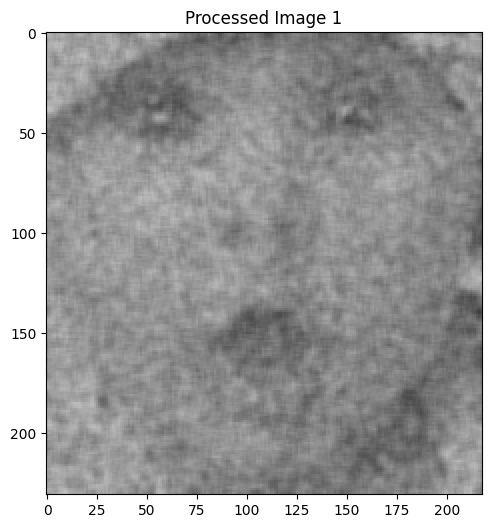

Đã xử lý và lưu ảnh mới cho tệp: baby.jpeg


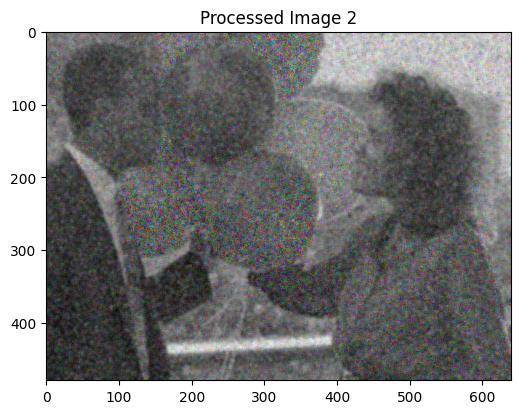

Đã xử lý và lưu ảnh mới cho tệp: balloons_noisy.png


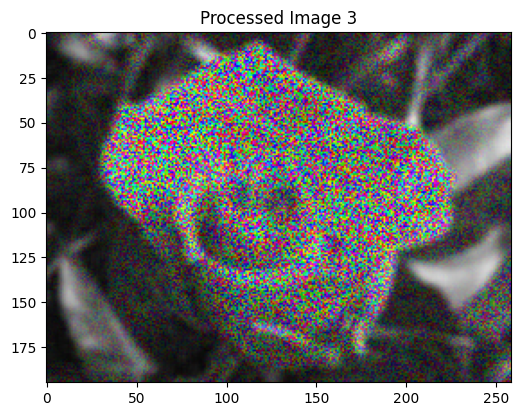

Đã xử lý và lưu ảnh mới cho tệp: flower.jpeg


In [ ]:
#cau9
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import os
import random
import matplotlib.pylab as plt
from skimage import color


input_folder = 'Exercise'
output_folder = 'Exercise_cau9'


os.makedirs(output_folder, exist_ok=True)

# Bộ lọc Mean Filter để khử nhiễu
mean_filter_kernel = np.ones((5, 5)) / 25

# Hàm khử nhiễu và đổi màu HSV ngẫu nhiên
def process_image(img, used_hues):
    # Khử nhiễu với bộ lọc Mean
    denoised_img = sn.convolve(img, mean_filter_kernel[..., None]).astype(np.uint8)
    
    # Chuyển ảnh từ RGB sang HSV
    hsv_img = color.rgb2hsv(denoised_img)
    
    # Đổi kênh Hue (H) ngẫu nhiên nhưng không trùng lặp
    height, width, _ = hsv_img.shape
    for i in range(height):
        for j in range(width):
            # Chọn một giá trị Hue ngẫu nhiên mà chưa được sử dụng
            random_hue = random.random()  # Chọn ngẫu nhiên giá trị Hue giữa 0 và 1
            while random_hue in used_hues:  # Đảm bảo không trùng lặp
                random_hue = random.random()
            hsv_img[i, j, 0] = random_hue
            used_hues.add(random_hue)  # Thêm giá trị Hue đã sử dụng vào tập
            
    # Chuyển ảnh lại từ HSV sang RGB
    rgb_img = color.hsv2rgb(hsv_img)
    return np.uint8(rgb_img * 255)  # Chuyển về phạm vi [0, 255]

# Đọc và xử lý các tệp ảnh trong thư mục
used_hues = set()  # Set để lưu các giá trị Hue đã sử dụng

for idx, filename in enumerate(os.listdir(input_folder)):
    input_path = os.path.join(input_folder, filename)
    
    # Đọc ảnh
    img = iio.imread(input_path)

    if img is not None:
        # Áp dụng khử nhiễu và đổi màu HSV ngẫu nhiên
        processed_img = process_image(img, used_hues)
        
        # Lưu ảnh mới đã thay đổi màu
        output_path = os.path.join(output_folder, f"colored_hsv_{idx+1}.png")
        iio.imsave(output_path, processed_img)
        
        # Hiển thị ảnh đã xử lý
        plt.figure(figsize=(6, 6))
        plt.imshow(processed_img)
        plt.title(f"Processed Image {idx+1}")
        plt.show()
        print(f"Đã xử lý và lưu ảnh mới cho tệp: {filename}")
    else:
        print(f"Lỗi: Không thể đọc tệp {filename}")
